# Aylar Khorsannia, 98100418, CO01 CHW3

## Problem 1

In [2]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt


تابع هدف ما در این سوال تابع زیر می‌باشد:
$$\sum_{t=1}^{T}(r^Tq_t+s^Tq_t^2)+\sum_{t=1}^{T-1}(\tilde{r}^T|f_t|+\tilde{s}^Tf_t^2)$$
و قیدهایی که متغیرهایمان باید در آن‌ها صدق کنند نیز قیود زیر هستند:
$$q_{t+1}=Af_t+q_t, \quad t=1,...,T-1$$
$$0\preceq q_t \preceq Q, \; t=2,...,T$$
$$|f_t|\preceq F, \; t=1,...,T-1$$
مساله را  به کمک کتابخانه‌ی 
cvxpy
 پیاده‌سازی کرده و جواب‌ها در زیر قابل مشاهده است.

In [3]:
# data for optimal evacuation problem
T = 30
A = np.array([[-1., -1., 0., 0., 0., 0., 0., 0., 0.],
              [1., 0., -1., 0., 0., 0., 0., 0., 0.],
              [0., 0., 1., -1., 0., 0., 0., 0., 0.],
              [0., 1., 0., 0., -1., -1., 0., 0., 0.],
              [0., 0., 0., 0., 1., 0., -1., 0., 0.],
              [0., 0., 0., 1., 0., 0., 1., -1., 0.],
              [0., 0., 0., 0., 0., 1., 0., 0., -1.],
              [0., 0., 0., 0., 0., 0., 0., 1., 1.]])
Q = np.array([1., 1., 1., 1., 1., 0.8, 1., 0.4])
F = np.array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25])
q1 = np.array([1., 0., 0., 0., 0., 0., 0., 0.])
r = np.array([1., 0.2, 0.2, 0.5, 0.5, 0., 0.5, 0.])
s = np.array([1., 0.2, 0.2, 0.5, 0.5, 0., 0.5, 0.])
rtild = np.array([0.1, 0.2, 0.1, 5., 0.4, 0.2, 0.4, 0.4, 0.2])
stild = np.array([2.8, 5.6, 2.8, 140., 11.2, 5.6, 11.2, 11.2, 5.6])


In [7]:
def opt_evac(A, Q, F, q1, r, s, rtild, stild, T):
    n, m = A.shape
    q = cvx.Variable((n, T))
    f = cvx.Variable((m, T - 1))
    node_risk = cvx.reshape(q.T @ r + cvx.square(q).T @ s,(30,1))
    edge_risk = cvx.vstack((cvx.reshape(cvx.abs(f).T @ rtild + cvx.square(f).T @ stild, (29,1)), np.array([[0]])))
    risk = node_risk + edge_risk

    constraints = [q[:, 0] == q1,
            q[:, 1:] == A @ f + q[:, :-1],
            0 <= q,
            q <= np.tile(Q, (T, 1)).T,
            cvx.abs(f) <= np.tile(F, (T - 1, 1)).T]
    problem = cvx.Problem(cvx.Minimize(sum(risk)), constraints)
    problem.solve(solver=cvx.ECOS)
    arr = lambda _: np.array(_.value)
    q, f, risk, node_risk = map(arr, (q, f, risk, node_risk))
    print("Total risk=")
    print(problem.value)
    print("Evac level: =", (node_risk <= 1e-4).nonzero()[0][0] + 1)
    return q, f, risk, node_risk


In [8]:
q, f, risk, node_risk = opt_evac(A, Q, F, q1, r, s, rtild, stild, T)


Total risk=
6.589671916236878
Evac level: = 17


In [9]:
plt.rc('text', usetex=True)

<function matplotlib.pyplot.show(close=None, block=None)>

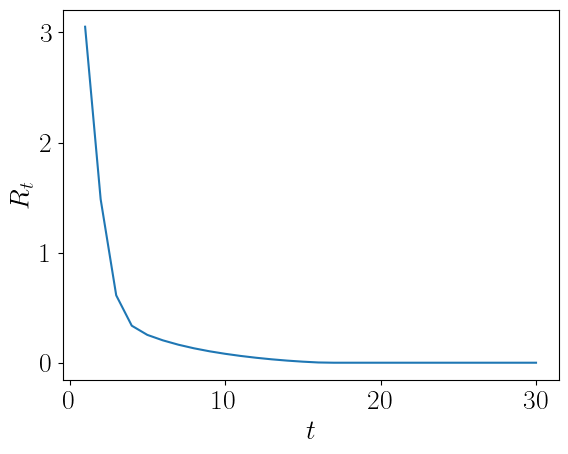

In [122]:
plt.plot(np.arange(1, T + 1), risk)
plt.xlabel('$t$')
plt.ylabel('$R_t$')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

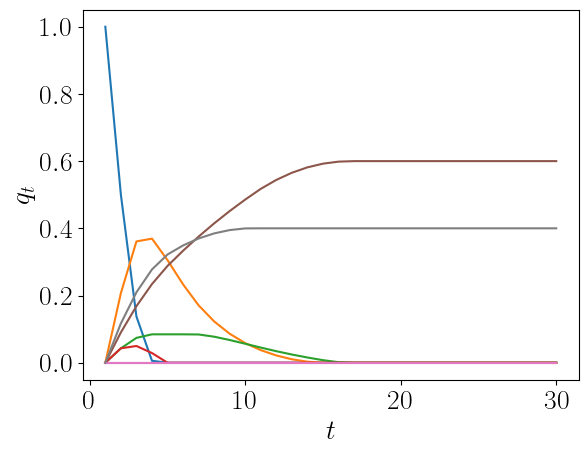

In [123]:
plt.plot(np.arange(1, T + 1), q.T)
plt.xlabel('$t$')
plt.ylabel('$q_t$')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

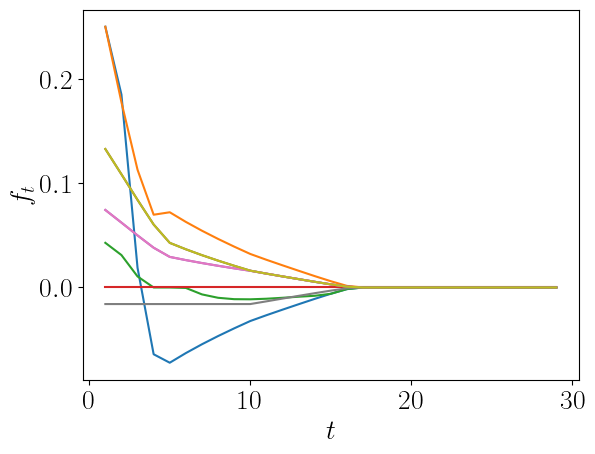

In [124]:
plt.plot(np.arange(1, T), f.T)
plt.xlabel('$t$')
plt.ylabel('$f_t$')
plt.show

## Problem 2

در این سوال همانطور که در مسائل هندسی دیده بودیم از توابع لگاریتم می‌گیریم و توابع جدیدی که خواهیم داشت توابعی محدب بر حسب لگاریتم متغیرمان هستند. پس اگر  یک ترکیب محدب  از نقاطمان بگیریم بنابر نامساوی ینسن چون توابع محدب بودند مقدار این توابع روی هر نقطه کمتر از این توابع در نقاط بردار مد نظرمان است. پس کافیست نقطه‌ای را پیدا کنیم که در قیود مساله‌ای که تعریف خواهیم کرد صدق کند. طبق نکات بیان‌شده این نقطه می‌تواند همان نقطه‌ی مد نظرمان در سوال باشد.

In [96]:
n = 10 # number of variables
k = 6  # number of designs

# component widths from known designas
# each column of W is a different design
W =([[ 1.8381,  1.5803, 12.4483,  4.4542,  6.5637,  5.8225],
    [ 1.0196,  3.0467, 18.4965,  3.6186,  7.6979,  2.3292],
    [ 1.6813,  1.9083, 17.3244,  4.677 ,  4.6581, 27.0291],
    [ 1.3795,  2.625 , 14.6737,  4.1361,  7.161 ,  7.5759],
    [ 1.8318,  1.4526, 17.2696,  3.7408,  2.2107, 10.3642],
    [ 1.5028,  3.0937, 14.9034,  4.4055,  7.8582, 20.5204],
    [ 1.7095,  2.1351, 10.1296,  4.0931,  2.9001,  9.9634],
    [ 1.4289,  3.58  ,  9.3459,  3.8898,  2.7663, 15.1383],
    [ 1.3046,  3.561 , 10.1179,  4.3891,  7.1302,  3.8139],
    [ 1.1897,  2.7807, 13.0112,  4.2426,  6.1611, 29.6734]])
W = np.array(W)

(W_min, W_max) = (1.0, 30.0)

# objective values for the different designs
# entry j gives the objective for design j
P = np.array([ 29.0148,  46.3369, 282.1749,  78.5183, 104.8087, 253.5439])
D = np.array([15.9522, 11.5012,  4.8148,  8.5697,  8.087 ,  6.0273])
A = np.array([ 22.3796,  38.7908, 204.1574,  62.5563,  81.2272, 200.5119])

# specifications
(P_spec, D_spec, A_spec) = (60.0, 10.0, 50.0)

In [100]:
x = cvx.Variable(k)
objective = cvx.Minimize(0)
constraints = [np.log(P)@x <= np.log(P_spec),
   np.log(D)@x <= np.log(D_spec),
   np.log(A)@x <= np.log(A_spec),
   cvx.sum(x)==1, x>=0]

problem = cvx.Problem(objective, constraints)
problem.solve()

w = np.exp(np.log(W) @ x.value)

print("W:")
print(w)

W:
[2.63859837 3.28069166 2.96934036 3.26617754 2.32426888 3.66532996
 2.92976112 3.68571815 3.8940303  3.3972013 ]


### Problem 3

### الف

از خواص ماتریس کوواریانس می‌دانیم که این ماتریس همیشه باید مثبت معین باشد پس کافی است مثالی بزنیم که ماتریس حاصل از آن مثبت معین نباشد که با قرار دادن:
$$
S=T=\begin{bmatrix}
 1 & 1 \\
 1 & 1
 \end{bmatrix} \Rightarrow
C=\begin{bmatrix}
 1 & 1 & 0 \\
 1 & 1 & 1 \\
 0 & 1 & 1
 \end{bmatrix}
$$
به یک ماتریس می‌رسیم که مثبت معین نیست.

### ب

تنها زمانی این اتفاق میوفتد که ماتریس 
$$C_{min}$$
یک ماتریس مثبت معین باشد.

### ج

متغیرها را طوری تعریف کردیم که ماتریس 
$$C$$
گفته‌شده در قسمت الف را بسازند. با تغییر متغیرها به حالت کلی مساله می‌رسیم.
و در نهایت از روی مقادیر ویژه‌ی آن می‌توانیم مثبت معین بودنش را تشخیص دهیم.

In [10]:
n1 = 1
n2 = 1
n3 = 1
n = n1 + n2 + n3
S = np.ones((n1+n2, n1+n2))
T = np.ones((n2+n3, n2+n3))
C = cvx.Variable((n,n), symmetric=True)
constraints = [C >> 0]

C1 = C[0:2, 0:2]
C2 = C[1:3, 1:3]
C_13 = C[0, 2]

objective = cvx.Minimize(
    cvx.norm(C1 - S, "fro")**2 + cvx.norm(C2 - T, "fro")**2 +
    cvx.norm(C_13, "fro")**2)

problem = cvx.Problem(objective, constraints)
problem.solve()

print ("Opt value:")
print(problem.value)
print ("Covariance matrix resampled:")
print(C.value)
print ("Eigenvalues:")
print(np.linalg.eig(C.value)[0])


Opt value:
0.1748449531164722
Covariance matrix resampled:
[[1.09855076 0.84973176 0.19710124]
 [0.84973176 1.11456302 0.84973176]
 [0.19710124 0.84973176 1.09855076]]
Eigenvalues:
[ 2.41021598e+00  9.01449521e-01 -9.60079865e-07]


### Problem 4

In [11]:
n = 4
m = 2 

A = np.array([
[ 0.95,  0.16,  0.12,  0.01],
[-0.12,  0.98, -0.11, -0.03],
[-0.16,  0.02,  0.98,  0.03],
[-0.  ,  0.02, -0.04,  1.03],
])

B = np.array([
[ 0.8 , 0. ],
[ 0.1 , 0.2],
[ 0.  , 0.8],
[-0.2 , 0.1],
])

x_init = np.ones(n)

T = 100


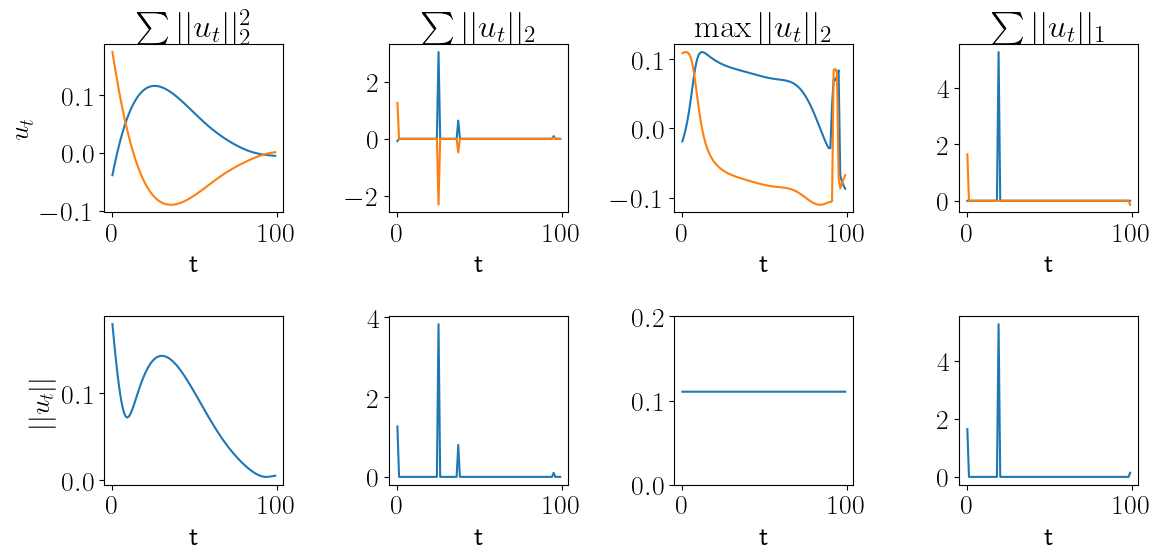

In [145]:
u_ = cvx.Variable((m,T))
x_ = cvx.Variable((n,T+1))
objs = [
   (cvx.Minimize(cvx.sum_squares(u_)) , "$\\sum||u_t||_2^2$"),
   (cvx.Minimize(cvx.sum(cvx.norm(u_,2,axis=0))) , "$\\sum||u_t||_2$"),
   (cvx.Minimize(cvx.max(cvx.norm(u_,axis=0))) , "$\\max||u_t||_2$"),
   (cvx.Minimize(cvx.sum(cvx.norm(u_,1,axis=0))) , "$\\sum||u_t||_1$")
   ]
plt.figure(figsize=(12,6))
for i,obj in enumerate(objs):

    constraints = [x_[:,-1] == np.zeros(n)]
    constraints.append(x_[:,0] == x_init)
    for t in range(1,T+1):
        constraints.append(x_[:,t] == A @ x_[:,t-1] + B @ u_[:,t-1])
    problem = cvx.Problem(obj[0],constraints)
    problem.solve()
    plt.subplot(2,4,i+1)
    plt.plot(u_.value.T)
    if i == 0:
       plt.ylabel("$u_t$")
    plt.title(obj[1])
    plt.xlabel("t")
    plt.subplot(2,4,i+5)
    plt.xlabel("t")
    plt.plot(np.linalg.norm(u_.value,axis=0),label="$||u||_2$")
    if i == 2:
       plt.ylim(ymax = .2,ymin=0)
    if i == 0:
       plt.ylabel("$||u_t||$")
plt.tight_layout()


الف: همانطور که از نمودار مشخص است در این حالت مقادیری که به دست می‌آید مقادیر کوچکی هستند و تابع نسبتا هموار است و تغییرات ناگهانی عجیبی ندارد و مطابق انتظار ما از روش کمترین مربعات می‌یاشد.


ب: در این حالت جواب دارای صفرهای زیادی است و در معدود جاهایی که صفر نیست هر دو مولفه آن ناصفر است.


ج: در این حالت نرم دوی تابع همواره ثابت است اما مولفه‌ها تغییرات زیادی دارند.


د: این حالت به شدت دارای صفرهای زیادی است و در نقاط بسیار کمی که صفر نیست نیز فقط یک مولفه ناصفر دارد.

### Problem 5

### الف

مساله را به این شکل بازنویسی می‌کنیم:
$$\begin{aligned}
		\text{minimize}\; \quad & -\mu ^T w + \gamma t
		\\
		\textrm{s.t} \quad &‌ w^T \Sigma^{(k)} w \leq t \; k=1,...,M
		\\ &‌ 1^Tw = 1
	\end{aligned}$$
حال باید شرایط 
$$KKT$$
را در سوال بررسی کنیم که با محاسبه تابع لاگرانژ و نیز صفر بودن مشتق حاصل می‌شود.
$$L=\mu^T-\gamma v - \sum \lambda_i(w^T\Sigma^{k}w-v) \Rightarrow \sum \lambda_i = \gamma$$

### ب

In [12]:
n = 10
M = 6
gamma = 1.0
mu = np.array([ 0.     , 0.01401, 0.03426, 0.07843, 0.06536,-0.0342 , 0.03325,-0.0053 ,
 -0.00361, 0.01437])
Sigma_1 = np.array([[ 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
   0.     , 0.     ],
 [ 0.     , 0.09551, 0.0349 , 0.06526, 0.02499, 0.08272, 0.0574 , 0.0279 ,
   0.06016, 0.02578],
 [ 0.     , 0.0349 , 0.10862, 0.05107, 0.04959, 0.08917, 0.03489, 0.03575,
   0.05086, 0.04512],
 [ 0.     , 0.06526, 0.05107, 0.08159, 0.04136, 0.06879, 0.05743, 0.03721,
   0.05037, 0.03557],
 [ 0.     , 0.02499, 0.04959, 0.04136, 0.05882, 0.05781, 0.03069, 0.02881,
   0.04037, 0.04467],
 [ 0.     , 0.08272, 0.08917, 0.06879, 0.05781, 0.11844, 0.05441, 0.03745,
   0.07088, 0.05695],
 [ 0.     , 0.0574 , 0.03489, 0.05743, 0.03069, 0.05441, 0.06421, 0.0201 ,
   0.05843, 0.02407],
 [ 0.     , 0.0279 , 0.03575, 0.03721, 0.02881, 0.03745, 0.0201 , 0.04035,
   0.03334, 0.01554],
 [ 0.     , 0.06016, 0.05086, 0.05037, 0.04037, 0.07088, 0.05843, 0.03334,
   0.07538, 0.02431],
 [ 0.     , 0.02578, 0.04512, 0.03557, 0.04467, 0.05695, 0.02407, 0.01554,
   0.02431, 0.04693]])
Sigma_2 = np.array([[ 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
   0.     , 0.     ],
 [ 0.     , 0.09527, 0.04324, 0.06411, 0.03937, 0.08697, 0.0531 , 0.02343,
   0.04872, 0.03118],
 [ 0.     , 0.04324, 0.10897, 0.05601, 0.0504 , 0.07851, 0.02892, 0.05001,
   0.05234, 0.03949],
 [ 0.     , 0.06411, 0.05601, 0.08566, 0.04111, 0.07517, 0.05672, 0.04489,
   0.04828, 0.02699],
 [ 0.     , 0.03937, 0.0504 , 0.04111, 0.0629 , 0.06144, 0.03637, 0.01778,
   0.03433, 0.03934],
 [ 0.     , 0.08697, 0.07851, 0.07517, 0.06144, 0.11296, 0.04474, 0.04238,
   0.0637 , 0.04279],
 [ 0.     , 0.0531 , 0.02892, 0.05672, 0.03637, 0.04474, 0.06381, 0.02148,
   0.04539, 0.02673],
 [ 0.     , 0.02343, 0.05001, 0.04489, 0.01778, 0.04238, 0.02148, 0.04386,
   0.02824, 0.02502],
 [ 0.     , 0.04872, 0.05234, 0.04828, 0.03433, 0.0637 , 0.04539, 0.02824,
   0.07299, 0.01923],
 [ 0.     , 0.03118, 0.03949, 0.02699, 0.03934, 0.04279, 0.02673, 0.02502,
   0.01923, 0.0441 ]])
Sigma_3 = np.array([[ 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
   0.     , 0.     ],
 [ 0.     , 0.09758, 0.036  , 0.05946, 0.03143, 0.08617, 0.05603, 0.02755,
   0.04373, 0.03548],
 [ 0.     , 0.036  , 0.11032, 0.07466, 0.04976, 0.06889, 0.04397, 0.0413 ,
   0.0693 , 0.05059],
 [ 0.     , 0.05946, 0.07466, 0.08391, 0.04429, 0.06875, 0.05999, 0.03834,
   0.05702, 0.03957],
 [ 0.     , 0.03143, 0.04976, 0.04429, 0.0628 , 0.0601 , 0.04081, 0.02044,
   0.0435 , 0.03797],
 [ 0.     , 0.08617, 0.06889, 0.06875, 0.0601 , 0.11514, 0.05033, 0.03409,
   0.05194, 0.05301],
 [ 0.     , 0.05603, 0.04397, 0.05999, 0.04081, 0.05033, 0.0634 , 0.03646,
   0.055  , 0.03016],
 [ 0.     , 0.02755, 0.0413 , 0.03834, 0.02044, 0.03409, 0.03646, 0.04068,
   0.03718, 0.02399],
 [ 0.     , 0.04373, 0.0693 , 0.05702, 0.0435 , 0.05194, 0.055  , 0.03718,
   0.07564, 0.02574],
 [ 0.     , 0.03548, 0.05059, 0.03957, 0.03797, 0.05301, 0.03016, 0.02399,
   0.02574, 0.04612]])
Sigma_4 = np.array([[ 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
   0.     , 0.     ],
 [ 0.     , 0.09257, 0.05796, 0.06027, 0.02972, 0.07934, 0.04614, 0.03909,
   0.04214, 0.04069],
 [ 0.     , 0.05796, 0.11237, 0.07639, 0.06354, 0.07092, 0.05474, 0.05455,
   0.04729, 0.05416],
 [ 0.     , 0.06027, 0.07639, 0.08818, 0.04459, 0.07078, 0.06168, 0.03892,
   0.05792, 0.02804],
 [ 0.     , 0.02972, 0.06354, 0.04459, 0.05821, 0.04937, 0.03315, 0.02327,
   0.03579, 0.04053],
 [ 0.     , 0.07934, 0.07092, 0.07078, 0.04937, 0.11239, 0.04701, 0.04395,
   0.05605, 0.05801],
 [ 0.     , 0.04614, 0.05474, 0.06168, 0.03315, 0.04701, 0.06062, 0.02048,
   0.03839, 0.02321],
 [ 0.     , 0.03909, 0.05455, 0.03892, 0.02327, 0.04395, 0.02048, 0.0407 ,
   0.03774, 0.03034],
 [ 0.     , 0.04214, 0.04729, 0.05792, 0.03579, 0.05605, 0.03839, 0.03774,
   0.07333, 0.03067],
 [ 0.     , 0.04069, 0.05416, 0.02804, 0.04053, 0.05801, 0.02321, 0.03034,
   0.03067, 0.04903]])
Sigma_5 = np.array([[ 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
   0.     , 0.     ],
 [ 0.     , 0.09782, 0.03566, 0.07154, 0.02311, 0.08306, 0.04749, 0.02112,
   0.0424 , 0.03644],
 [ 0.     , 0.03566, 0.10871, 0.07059, 0.06327, 0.07008, 0.05601, 0.03631,
   0.04979, 0.03542],
 [ 0.     , 0.07154, 0.07059, 0.08676, 0.03368, 0.07664, 0.04439, 0.03324,
   0.04954, 0.04171],
 [ 0.     , 0.02311, 0.06327, 0.03368, 0.06425, 0.06407, 0.03624, 0.02072,
   0.03599, 0.03501],
 [ 0.     , 0.08306, 0.07008, 0.07664, 0.06407, 0.12031, 0.05653, 0.04843,
   0.07035, 0.0477 ],
 [ 0.     , 0.04749, 0.05601, 0.04439, 0.03624, 0.05653, 0.06048, 0.02421,
   0.04491, 0.03085],
 [ 0.     , 0.02112, 0.03631, 0.03324, 0.02072, 0.04843, 0.02421, 0.04139,
   0.03155, 0.01375],
 [ 0.     , 0.0424 , 0.04979, 0.04954, 0.03599, 0.07035, 0.04491, 0.03155,
   0.07377, 0.02758],
 [ 0.     , 0.03644, 0.03542, 0.04171, 0.03501, 0.0477 , 0.03085, 0.01375,
   0.02758, 0.04266]])
Sigma_6 = np.array([[ 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
   0.     , 0.     ],
 [ 0.     , 0.09255, 0.04784, 0.06448, 0.03509, 0.0763 , 0.04992, 0.02928,
   0.0457 , 0.03255],
 [ 0.     , 0.04784, 0.1073 , 0.06532, 0.06136, 0.08782, 0.04596, 0.04693,
   0.05876, 0.04758],
 [ 0.     , 0.06448, 0.06532, 0.08067, 0.04062, 0.07364, 0.05039, 0.03586,
   0.06005, 0.03123],
 [ 0.     , 0.03509, 0.06136, 0.04062, 0.05804, 0.05872, 0.03194, 0.02341,
   0.04013, 0.03734],
 [ 0.     , 0.0763 , 0.08782, 0.07364, 0.05872, 0.10969, 0.05726, 0.04673,
   0.05876, 0.0505 ],
 [ 0.     , 0.04992, 0.04596, 0.05039, 0.03194, 0.05726, 0.06021, 0.02738,
   0.04926, 0.02845],
 [ 0.     , 0.02928, 0.04693, 0.03586, 0.02341, 0.04673, 0.02738, 0.0397 ,
   0.02841, 0.02057],
 [ 0.     , 0.0457 , 0.05876, 0.06005, 0.04013, 0.05876, 0.04926, 0.02841,
   0.07194, 0.0291 ],
 [ 0.     , 0.03255, 0.04758, 0.03123, 0.03734, 0.0505 , 0.02845, 0.02057,
   0.0291 , 0.04176]])


In [13]:
w = cvx.Variable(n)
t = cvx.Variable()
risks = [cvx.quad_form(w, Sigma) for Sigma in
    (Sigma_1, Sigma_2, Sigma_3, Sigma_4, Sigma_5, Sigma_6)]
risk_constraints = [risk <= t for risk in risks]
problem = cvx.Problem(cvx.Maximize(w.T @ mu - gamma * t),
    risk_constraints + [cvx.sum(w) == 1])
problem.solve()
print("weights:")
print(w.value)
print("gamma_k values:")
print([(risk.dual_value[0]) for risk in risk_constraints])
print("risk values:")
print([(risk.value) for risk in risks])
print('worst case risk:')
print(t.value)

weights:
[ 0.42473821  0.66426997 -0.11469037  1.38055509  1.42422852 -1.5270649
 -0.61401545 -0.49879081 -0.25406876  0.11483851]
gamma_k values:
[0.2923155453772483, 3.3561736745382154e-10, 3.536290892159205e-10, 0.4658023631203952, 0.14230458870684565, 0.09957750229760477]
risk values:
[0.12188147869220614, 0.0845435093271856, 0.08247154816160536, 0.12188147866244929, 0.12188147865295149, 0.12188147858606291]
worst case risk:
0.12188147866931098
